<center><img src="https://github.com/pandas-dev/pandas/raw/main/web/pandas/static/img/pandas.svg" alt="pandas Logo" style="width: 800px;"/></center>

# Introduction to Pandas

## Imports

You will often see the nickname `pd` used as an abbreviation for pandas in the import statement, just like `numpy` is often imported as `np`. We also import the `DATASETS` class from `pythia_datasets`, which allows us to use example datasets created for Pythia.

In [1]:
import pandas as pd
from pythia_datasets import DATASETS

## The pandas [`DataFrame`](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)...
...is a **labeled**, two-dimensional columnar structure, similar to a table, spreadsheet, or the R `data.frame`.

![dataframe schematic](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_dataframe.svg "Schematic of a pandas DataFrame")

The `columns` that make up our `DataFrame` can be lists, dictionaries, NumPy arrays, pandas `Series`, or many other data types not mentioned here. Within these `columns`, you can have data values of many different data types used in Python and NumPy, including text, numbers, and dates/times. The first column of a `DataFrame`, shown in the image above in dark gray, is uniquely referred to as an `index`; this column contains information characterizing each row of our `DataFrame`. Similar to any other `column`, the `index` can label rows by text, numbers, datetime objects, and many other data types. Datetime objects are a quite popular way to label rows.

For our first example using Pandas DataFrames, we start by reading in some data in comma-separated value (`.csv`) format. We retrieve this dataset from the Pythia DATASETS class (imported at the top of this page); however, the dataset was originally contained within the NCDC teleconnections database. This dataset contains many types of geoscientific data, including El Nino/Southern Oscillation indices. For more information on this dataset, review the description [here](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/).

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    As described above, we are retrieving the datasets for these examples from Project Pythia's custom library of example data. In order to retrieve datasets from this library, you must use the statement <code>from pythia_datasets import DATASETS</code>. This is shown and described in the Imports section at the top of this page. The <code>fetch()</code> method of the <code>DATASETS</code> class will automatically download the data file specified as a string argument, in this case <code>enso_data.csv</code>, and cache the file locally, assuming the argument corresponds to a valid Pythia example dataset. This is illustrated in the following example.
</div>

In [2]:
filepath = DATASETS.fetch('enso_data.csv')

Once we have a valid path to a data file that Pandas knows how to read, we can open it, as shown in the following example:

In [3]:
df = pd.read_csv(filepath)

If we print out our `DataFrame`, it will render as text by default, in a tabular-style ASCII output, as shown in the following example. However, if you are using a Jupyter notebook, there exists a better way to print `DataFrames`, as described below.

In [4]:
print(df)

       datetime  Nino12  Nino12anom  Nino3  Nino3anom  Nino4  Nino4anom  \
0    1982-01-01   24.29       -0.17  25.87       0.24  28.30       0.00   
1    1982-02-01   25.49       -0.58  26.38       0.01  28.21       0.11   
2    1982-03-01   25.21       -1.31  26.98      -0.16  28.41       0.22   
3    1982-04-01   24.50       -0.97  27.68       0.18  28.92       0.42   
4    1982-05-01   23.97       -0.23  27.79       0.71  29.49       0.70   
..          ...     ...         ...    ...        ...    ...        ...   
467  2020-12-01   22.16       -0.60  24.38      -0.83  27.65      -0.95   
468  2021-01-01   23.89       -0.64  25.06      -0.55  27.10      -1.25   
469  2021-02-01   25.55       -0.66  25.80      -0.57  27.20      -1.00   
470  2021-03-01   26.48       -0.26  26.80      -0.39  27.79      -0.55   
471  2021-04-01   24.89       -0.80  26.96      -0.65  28.47      -0.21   

     Nino34  Nino34anom  
0     26.72        0.15  
1     26.70       -0.02  
2     27.20       -0.

As described above, there is a better way to print Pandas `DataFrames`. If you are using a Jupyter notebook, you can run a code cell containing the `DataFrame` object name, by itself, and it will display a nicely rendered table, as shown below.

In [5]:
df

,datetime,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
0,1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1,1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
2,1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
3,1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
4,1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...,...
467,2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
468,2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
469,2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92
470,2021-03-01,26.48,-0.26,26.80,-0.39,27.79,-0.55,26.75,-0.51


The `DataFrame` index, as described above, contains information characterizing rows; each row has a unique ID value, which is displayed in the index column.  By default, the IDs for rows in a `DataFrame` are represented as sequential integers, which start at 0.

In [6]:
df.index

RangeIndex(start=0, stop=472, step=1)

At the moment, the index column of our `DataFrame` is not very helpful for humans. However, Pandas has clever ways to make index columns more human-readable. The next example demonstrates how to use optional keyword arguments to convert `DataFrame` index IDs to a human-friendly datetime format.

In [7]:
df = pd.read_csv(filepath, index_col=0, parse_dates=True)

df

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92


In [8]:
df.index

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='datetime', length=472, freq=None)

Each of our data rows is now helpfully labeled by a datetime-object-like index value; this means that we can now easily identify data values not only by named columns, but also by date labels on rows. This is a sneak preview of the `DatetimeIndex` functionality of Pandas; this functionality enables a large portion of Pandas' timeseries-related usage. Don't worry; `DatetimeIndex` will be discussed in full detail later on this page. In the meantime, let's look at the columns of data read in from the `.csv` file:

In [9]:
df.columns

Index(['Nino12', 'Nino12anom', 'Nino3', 'Nino3anom', 'Nino4', 'Nino4anom',
       'Nino34', 'Nino34anom'],
      dtype='object')

## The pandas [`Series`](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)...

...is essentially any one of the columns of our `DataFrame`. A `Series` also includes the index column from the source `DataFrame`, in order to provide a label for each value in the `Series`.

![pandas Series](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_series.svg "Schematic of a pandas Series")

The pandas `Series` is a fast and capable 1-dimensional array of nearly any data type we could want, and it can behave very similarly to a NumPy `ndarray` or a Python `dict`. You can take a look at any of the `Series` that make up your `DataFrame`, either by using its column name and the Python `dict` notation, or by using dot-shorthand with the column name:

In [10]:
df["Nino34"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

<div class="alert alert-block alert-info">
<b>Tip:</b> You can also use the dot notation illustrated below to specify a column name, but this syntax is mostly provided for convenience. For the most part, this notation is interchangeable with the dictionary notation; however, if the column name is not a valid Python identifier (e.g., it starts with a number or space), you cannot use dot notation.</div>

In [11]:
df.Nino34

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

## Slicing and Dicing the `DataFrame` and `Series`

In this section, we will expand on topics covered in the previous sections on this page. One of the most important concepts to learn about Pandas is that it allows you to _**access anything by its associated label**_, regardless of data organization structure.

### Indexing a `Series`

As a review of previous examples, we'll start our next example by pulling a `Series` out of our `DataFrame` using its column label.

In [12]:
nino34_series = df["Nino34"]

nino34_series

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

You can use syntax similar to that of NumPy `ndarrays` to index, select, and subset with Pandas `Series`, as shown in this example:

In [13]:
nino34_series[3]

28.02

You can also use labels alongside Python dictionary syntax to perform the same operations:

In [14]:
nino34_series["1982-04-01"]

28.02

You can probably figure out some ways to extend these indexing methods, as shown in the following examples:

In [15]:
nino34_series[0:12]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Index-based slices are <b>exclusive</b> of the final value, similar to Python's usual indexing rules.
</div>

However, there are many more ways to index a `Series`. The following example shows a powerful and useful indexing method:

In [16]:
nino34_series["1982-01-01":"1982-12-01"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

This is an example of label-based slicing. With label-based slicing, Pandas will automatically find a range of values based on the labels you specify.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    As opposed to index-based slices, label-based slices are <b>inclusive</b> of the final value.
</div>

If you already have some knowledge of xarray, you will quite likely know how to create `slice` objects by hand.

In [17]:
nino34_series[slice("1982-01-01", "1982-12-01")]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

### Using `.iloc` and `.loc` to index

In this section, we introduce ways to access data that are preferred by Pandas over the methods listed above. When accessing by label, it is preferred to use the `.loc` method, and when accessing by index, the `.iloc` method is preferred. These methods behave similarly to the notation introduced above, but provide more speed, security, and rigor in your value selection. Using these methods can also help you avoid [chained assignment warnings](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy) generated by pandas.

In [18]:
nino34_series.iloc[3]

28.02

In [19]:
nino34_series.iloc[0:12]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

In [20]:
nino34_series.loc["1982-04-01"]

28.02

In [21]:
nino34_series.loc["1982-01-01":"1982-12-01"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

### Extending to the `DataFrame`

These subsetting capabilities can also be used in a full `DataFrame`; however, if you use the same syntax, there are issues, as shown below:

In [22]:
df["1982-01-01"]

KeyError: '1982-01-01'

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Attempting to use <code>Series</code> subsetting with a <code>DataFrame</code> can crash your program. A proper way to subset a <code>DataFrame</code> is shown below.
</div>

When indexing a `DataFrame`, pandas will not assume as readily the intention of your code. In this case, using a row label by itself will not work; **with `DataFrames`, labels are used for identifying columns**.

In [23]:
df["Nino34"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

As shown below, you also cannot subset columns in a `DataFrame` using integer indices:

In [24]:
df[0]

KeyError: 0

From earlier examples, we know that we can use an index or label with a `DataFrame` to pull out a column as a `Series`, and we know that we can use an index or label with a `Series` to pull out a single value.  Therefore, by chaining brackets, we can pull any individual data value out of the `DataFrame`.

In [25]:
df["Nino34"]["1982-04-01"]

28.02

In [26]:
df["Nino34"][3]

28.02

However, subsetting data using this chained-bracket technique is not preferred by Pandas. As described above, Pandas prefers us to use the `.loc` and `.iloc` methods for subsetting.  In addition, these methods provide a clearer, more efficient way to extract specific data from a `DataFrame`, as illustrated below:

In [27]:
df.loc["1982-04-01", "Nino34"]

28.02

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    When using this syntax to pull individual data values from a DataFrame, make sure to list the row first, and then the column.
</div>

The `.loc` and `.iloc` methods also allow us to pull entire rows out of a `DataFrame`, as shown in these examples:

In [28]:
df.loc["1982-04-01"]

Nino12        24.50
Nino12anom    -0.97
Nino3         27.68
Nino3anom      0.18
Nino4         28.92
Nino4anom      0.42
Nino34        28.02
Nino34anom     0.24
Name: 1982-04-01 00:00:00, dtype: float64

In [29]:
df.loc["1982-01-01":"1982-12-01"]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
1982-06-01,22.89,0.07,27.46,1.03,29.76,0.92,28.75,1.10
1982-07-01,22.47,0.87,26.44,0.82,29.38,0.58,28.10,0.88
1982-08-01,21.75,1.10,26.15,1.16,29.04,0.36,27.93,1.11
1982-09-01,21.80,1.44,26.52,1.67,29.16,0.47,28.11,1.39


In [30]:
df.iloc[3]

Nino12        24.50
Nino12anom    -0.97
Nino3         27.68
Nino3anom      0.18
Nino4         28.92
Nino4anom      0.42
Nino34        28.02
Nino34anom     0.24
Name: 1982-04-01 00:00:00, dtype: float64

In [31]:
df.iloc[0:12]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
1982-06-01,22.89,0.07,27.46,1.03,29.76,0.92,28.75,1.10
1982-07-01,22.47,0.87,26.44,0.82,29.38,0.58,28.10,0.88
1982-08-01,21.75,1.10,26.15,1.16,29.04,0.36,27.93,1.11
1982-09-01,21.80,1.44,26.52,1.67,29.16,0.47,28.11,1.39


In the next example, we illustrate how you can use slices of rows and lists of columns to create a smaller `DataFrame` out of an existing `DataFrame`:

In [32]:
df.loc[
    "1982-01-01":"1982-12-01",  # slice of rows
    ["Nino12", "Nino3", "Nino4", "Nino34"],  # list of columns
]

,Nino12,Nino3,Nino4,Nino34
datetime,,,,
1982-01-01,24.29,25.87,28.30,26.72
1982-02-01,25.49,26.38,28.21,26.70
1982-03-01,25.21,26.98,28.41,27.20
1982-04-01,24.50,27.68,28.92,28.02
1982-05-01,23.97,27.79,29.49,28.54
1982-06-01,22.89,27.46,29.76,28.75
1982-07-01,22.47,26.44,29.38,28.10
1982-08-01,21.75,26.15,29.04,27.93
1982-09-01,21.80,26.52,29.16,28.11


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    There are certain limitations to these subsetting techniques. For more information on these limitations, as well as a comparison of <code>DataFrame</code> and <code>Series</code> indexing methods, see the <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Pandas indexing documentation.</a>
</div>

## Exploratory Data Analysis

### Get a Quick Look at the Beginning/End of your `DataFrame`
Pandas also gives you a few shortcuts to quickly investigate entire `DataFrames`. The `head` method shows the first five rows of a `DataFrame`, and the `tail` method shows the last five rows of a `DataFrame`.

In [33]:
df.head()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69


In [34]:
df.tail()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92
2021-03-01,26.48,-0.26,26.80,-0.39,27.79,-0.55,26.75,-0.51
2021-04-01,24.89,-0.80,26.96,-0.65,28.47,-0.21,27.40,-0.49


### Quick Plots of Your Data
A good way to explore your data is by making a simple plot. Pandas contains its own `plot` method; this allows us to plot Pandas series without needing `matplotlib`.  In this example, we plot the `Nino34` series of our `df` `DataFrame` in this way:

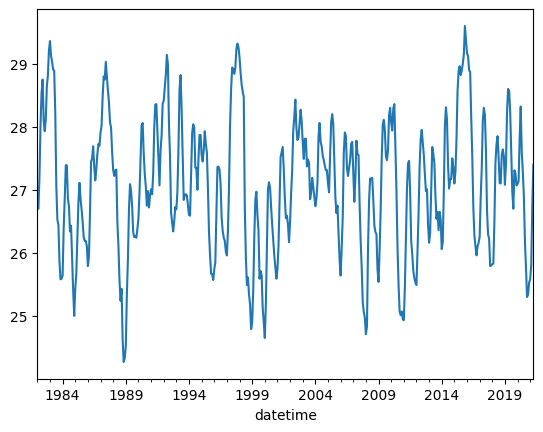

In [35]:
df.Nino34.plot();

Before, we called `.plot()`, which generated a single line plot. Line plots can be helpful for understanding some types of data, but there are other types of data that can be better understood with different plot types. For example, if your data values form a distribution, you can better understand them using a histogram plot.

The code for plotting histogram data differs in two ways from the code above for the line plot. First, two series are being used from the `DataFrame` instead of one.  Second, after calling the `plot` method, we call an additional method called `hist`, which converts the plot into a histogram.

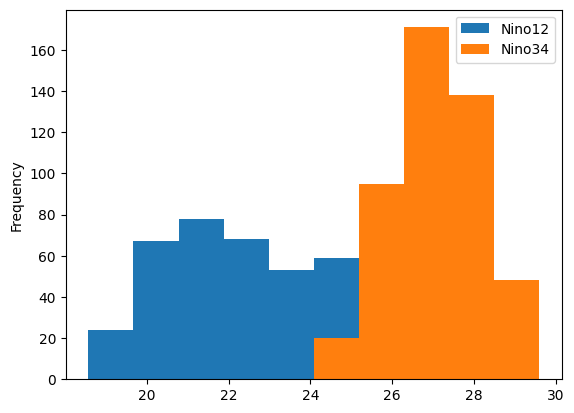

In [36]:
df[['Nino12', 'Nino34']].plot.hist();

The histogram plot helped us better understand our data; there are clear differences in the distributions. To even better understand this type of data, it may also be helpful to create a box plot. This can be done using the same line of code, with one change: we call the `box` method instead of `hist`.

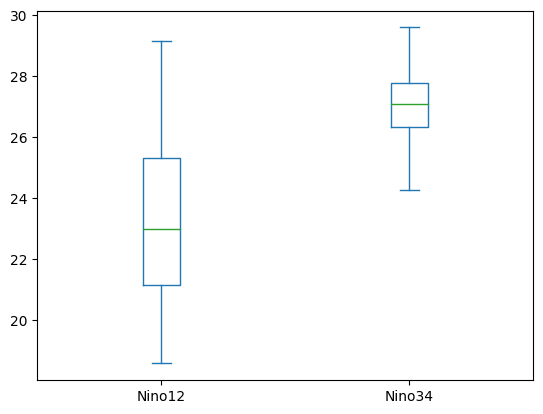

In [37]:
df[['Nino12', 'Nino34']].plot.box();

Just like the histogram plot, this box plot indicates a clear difference in the distributions. Using multiple types of plot in this way can be useful for verifying large datasets. The pandas plotting methods are capable of creating many different types of plots. To see how to use the plotting methods to generate each type of plot, please review the [pandas plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### Customize your Plot
The pandas plotting methods are, in fact, wrappers for similar methods in matplotlib. This means that you can customize pandas plots by including keyword arguments to the plotting methods.  These keyword arguments, for the most part, are equivalent to their matplotlib counterparts.

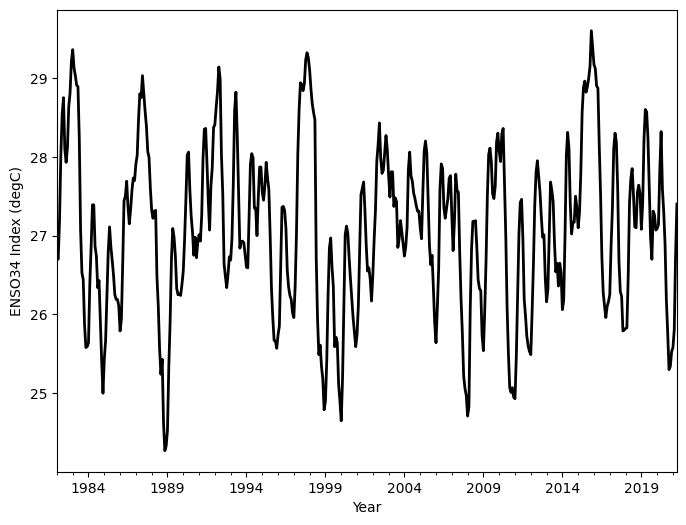

In [38]:
df.Nino34.plot(
    color='black',
    linewidth=2,
    xlabel='Year',
    ylabel='ENSO34 Index (degC)',
    figsize=(8, 6),
);

Although plotting data can provide a clear visual picture of data values, sometimes a more quantitative look at data is warranted. As elaborated on in the next section, this can be achieved using the `describe` method.  The `describe` method is called on the entire `DataFrame`, and returns various summarized statistics for each column in the `DataFrame`.
### Basic Statistics

We can garner statistics for a `DataFrame` by using the `describe` method. When this method is called on a `DataFrame`, a set of statistics is returned in tabular format.  The columns match those of the `DataFrame`, and the rows indicate different statistics, such as minimum.

In [39]:
df.describe()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,23.209619,0.059725,25.936568,0.039428,28.625064,0.063814,27.076780,0.034894
std,2.431522,1.157590,1.349621,0.965464,0.755422,0.709401,1.063004,0.947936
min,18.570000,-2.100000,23.030000,-2.070000,26.430000,-1.870000,24.270000,-2.380000
25%,21.152500,-0.712500,24.850000,-0.600000,28.140000,-0.430000,26.330000,-0.572500
50%,22.980000,-0.160000,25.885000,-0.115000,28.760000,0.205000,27.100000,0.015000
75%,25.322500,0.515000,26.962500,0.512500,29.190000,0.630000,27.792500,0.565000
max,29.150000,4.620000,29.140000,3.620000,30.300000,1.670000,29.600000,2.950000


You can also view specific statistics using corresponding methods. In this example, we look at the mean values in the entire `DataFrame`, using the `mean` method.  When such methods are called on the entire `DataFrame`, a `Series` is returned. The indices of this `Series` are the column names in the `DataFrame`, and the values are the calculated values (in this case, mean values) for the `DataFrame` columns.

In [40]:
df.mean()

Nino12        23.209619
Nino12anom     0.059725
Nino3         25.936568
Nino3anom      0.039428
Nino4         28.625064
Nino4anom      0.063814
Nino34        27.076780
Nino34anom     0.034894
dtype: float64

If you want a specific statistic for only one column in the `DataFrame`, pull the column out of the `DataFrame` with dot notation, then call the statistic function (in this case, mean) on that column, as shown below:

In [41]:
df.Nino34.mean()

27.07677966101695

### Subsetting Using the Datetime Column

Slicing is a useful technique for subsetting a `DataFrame`, but there are also other options that can be equally useful. In this section, some of these additional techniques are covered.

If your `DataFrame` uses datetime values for indices, you can select data from only one month using `df.index.month`. In this example, we specify the number 1, which only selects data from January.

In [42]:
# Uses the datetime column
df[df.index.month == 1]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79
1984-01-01,24.18,-0.28,24.82,-0.81,27.64,-0.66,25.64,-0.93
1985-01-01,23.59,-0.87,24.51,-1.12,27.71,-0.59,25.43,-1.14
1986-01-01,24.61,0.15,24.73,-0.90,28.11,-0.19,25.79,-0.78
1987-01-01,25.30,0.84,26.69,1.06,29.02,0.72,27.91,1.34
1988-01-01,24.64,0.18,26.12,0.49,29.13,0.83,27.32,0.75
1989-01-01,24.09,-0.37,24.15,-1.48,26.54,-1.76,24.53,-2.04
1990-01-01,24.02,-0.44,25.34,-0.29,28.56,0.26,26.55,-0.02


This example shows how to create a new column containing the month portion of the datetime index for each data row. The value returned by `df.index.month` is used to obtain the data for this new column:

In [43]:
df['month'] = df.index.month

This next example illustrates how to use the new month column to calculate average monthly values over the other data columns. First, we use the `groupby` method to group the other columns by the month.  Second, we take the average (mean) to obtain the monthly averages. Finally, we plot the resulting data as a line plot by simply calling `plot()`.

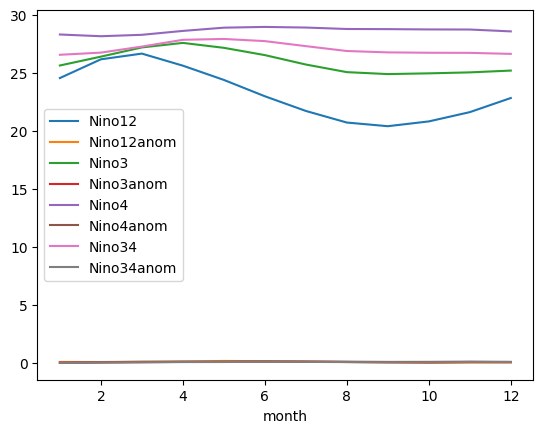

In [44]:
df.groupby('month').mean().plot();

### Investigating Extreme Values

If you need to search for rows that meet a specific criterion, you can use **conditional indexing**.  In this example, we search for rows where the Nino34 anomaly value (`Nino34anom`) is greater than 2:

In [45]:
df[df.Nino34anom > 2]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,month
datetime,,,,,,,,,
1982-11-01,24.59,3.00,27.62,2.64,29.23,0.60,28.81,2.16,11
1982-12-01,26.13,3.34,28.39,3.25,29.15,0.66,29.21,2.64,12
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79,1
1983-02-01,28.09,2.02,28.92,2.55,28.79,0.69,29.13,2.41,2
1997-08-01,24.80,4.15,27.84,2.85,29.26,0.58,28.84,2.02,8
1997-09-01,24.40,4.04,27.84,2.99,29.32,0.63,28.93,2.21,9
1997-10-01,24.58,3.76,28.17,3.25,29.32,0.66,29.23,2.54,10
1997-11-01,25.63,4.04,28.55,3.57,29.49,0.86,29.32,2.67,11
1997-12-01,26.92,4.13,28.76,3.62,29.32,0.83,29.26,2.69,12


This example shows how to use the `sort_values` method on a `DataFrame`. This method sorts values in a `DataFrame` by the column specified as an argument.

In [46]:
df.sort_values('Nino34anom')

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,month
datetime,,,,,,,,,
1988-11-01,20.55,-1.04,23.03,-1.95,26.76,-1.87,24.27,-2.38,11
1988-12-01,21.80,-0.99,23.07,-2.07,26.75,-1.74,24.33,-2.24,12
1988-10-01,19.50,-1.32,23.17,-1.75,27.06,-1.60,24.62,-2.07,10
1989-01-01,24.09,-0.37,24.15,-1.48,26.54,-1.76,24.53,-2.04,1
2000-01-01,23.86,-0.60,23.88,-1.75,26.96,-1.34,24.65,-1.92,1
...,...,...,...,...,...,...,...,...,...
1997-11-01,25.63,4.04,28.55,3.57,29.49,0.86,29.32,2.67,11
1997-12-01,26.92,4.13,28.76,3.62,29.32,0.83,29.26,2.69,12
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79,1


You can also reverse the ordering of the sort by specifying the `ascending` keyword argument as `False`:

In [47]:
df.sort_values('Nino34anom', ascending=False)

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,month
datetime,,,,,,,,,
2015-11-01,23.83,2.24,27.91,2.93,30.30,1.67,29.60,2.95,11
2015-12-01,25.01,2.19,27.99,2.85,30.11,1.63,29.39,2.82,12
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79,1
1997-12-01,26.92,4.13,28.76,3.62,29.32,0.83,29.26,2.69,12
1997-11-01,25.63,4.04,28.55,3.57,29.49,0.86,29.32,2.67,11
...,...,...,...,...,...,...,...,...,...
2000-01-01,23.86,-0.60,23.88,-1.75,26.96,-1.34,24.65,-1.92,1
1989-01-01,24.09,-0.37,24.15,-1.48,26.54,-1.76,24.53,-2.04,1
1988-10-01,19.50,-1.32,23.17,-1.75,27.06,-1.60,24.62,-2.07,10


### Resampling
In these examples, we illustrate a process known as resampling. Using resampling, you can change the frequency of index data values, reducing so-called 'noise' in a data plot. This is especially useful when working with timeseries data; plots can be equally effective with resampled data in these cases. The resampling performed in these examples converts monthly values to yearly averages. This is performed by passing the value '1Y' to the `resample` method.

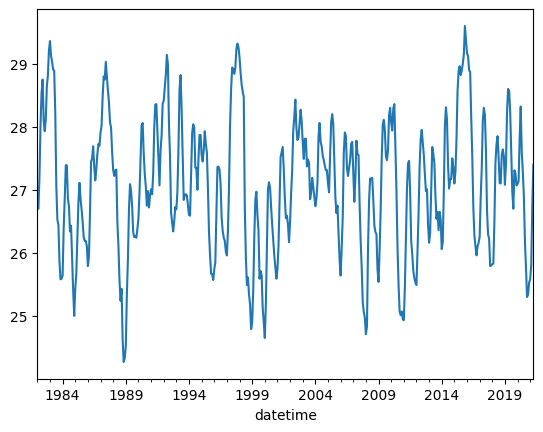

In [48]:
df.Nino34.plot();

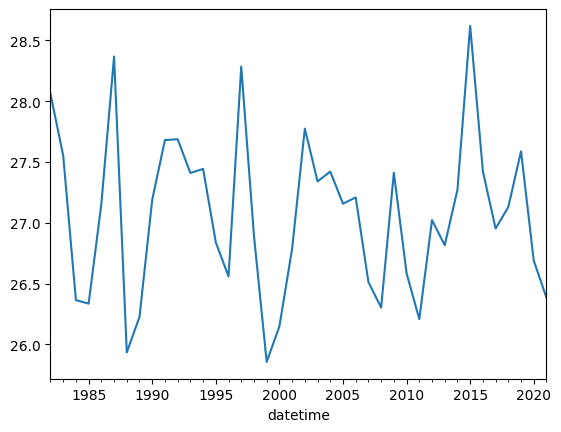

In [49]:
df.Nino34.resample('1Y').mean().plot();

### Applying operations to a DataFrame

One of the most commonly used features in Pandas is the performing of calculations to multiple data values in a `DataFrame` simultaneously. Let's first look at a familiar concept: a function that converts single values.  The following example uses such a function to convert temperature values from degrees Celsius to Kelvin.

In [50]:
def convert_degc_to_kelvin(temperature_degc):
    """
    Converts from degrees celsius to Kelvin
    """

    return temperature_degc + 273.15

In [51]:
# Convert a single value
convert_degc_to_kelvin(0)

273.15

The following examples instead illustrate a new concept: using such functions with `DataFrames` and `Series`. For the first example, we start by creating a `Series`; in order to do so, we subset the `DataFrame` by the `Nino34` column. This has already been done earlier in this page; we do not need to create this `Series` again. We are using this particular `Series` for a reason: the data values are in degrees Celsius.

In [52]:
nino34_series

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

Here, we look at a portion of an existing `DataFrame` column. Notice that this column portion is a Pandas `Series`.

In [53]:
type(df.Nino12[0:10])

pandas.core.series.Series

As shown in the following example, each Pandas `Series` contains a representation of its data in numpy format. Therefore, it is possible to convert a Pandas `Series` into a numpy array; this is done using the `.values` method:

In [54]:
type(df.Nino12.values[0:10])

numpy.ndarray

This example illustrates how to use the temperature-conversion function defined above on a `Series` object. Just as calling the function with a single value returns a single value, calling the function on a `Series` object returns another `Series` object. The function performs the temperature conversion on each data value in the `Series`, and returns a `Series` with all values converted.

In [55]:
convert_degc_to_kelvin(nino34_series)

datetime
1982-01-01    299.87
1982-02-01    299.85
1982-03-01    300.35
1982-04-01    301.17
1982-05-01    301.69
               ...  
2020-12-01    298.68
2021-01-01    298.73
2021-02-01    298.96
2021-03-01    299.90
2021-04-01    300.55
Name: Nino34, Length: 472, dtype: float64

If we call the `.values` method on the `Series` passed to the function, the `Series` is converted to a numpy array, as described above. The function then converts each value in the numpy array, and returns a new numpy array with all values sorted.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    It is recommended to only convert <code>Series</code> to NumPy arrays when necessary; doing so removes the label information that enables much of the Pandas core functionality.
</div>

In [56]:
convert_degc_to_kelvin(nino34_series.values)

array([299.87, 299.85, 300.35, 301.17, 301.69, 301.9 , 301.25, 301.08,
       301.26, 301.79, 301.96, 302.36, 302.51, 302.28, 302.18, 302.06,
       302.04, 301.39, 300.22, 299.68, 299.59, 299.02, 298.73, 298.74,
       298.79, 299.54, 300.01, 300.54, 300.54, 300.01, 299.89, 299.49,
       299.58, 299.08, 298.56, 298.15, 298.58, 298.82, 299.38, 299.95,
       300.26, 300.01, 299.84, 299.65, 299.4 , 299.34, 299.34, 299.26,
       298.94, 299.09, 299.8 , 300.59, 300.65, 300.84, 300.52, 300.3 ,
       300.48, 300.72, 300.88, 300.85, 301.06, 301.17, 301.62, 301.95,
       301.9 , 302.18, 301.95, 301.73, 301.54, 301.22, 301.14, 300.75,
       300.47, 300.37, 300.46, 300.47, 299.63, 299.26, 298.72, 298.39,
       298.58, 297.77, 297.42, 297.48, 297.68, 298.48, 299.05, 299.84,
       300.24, 300.13, 299.89, 299.48, 299.4 , 299.41, 299.39, 299.53,
       299.7 , 300.1 , 300.61, 301.17, 301.21, 300.73, 300.4 , 300.2 ,
       299.9 , 300.13, 299.87, 300.06, 300.16, 300.08, 300.4 , 301.13,
      

As described above, when our temperature-conversion function accepts a `Series` as an argument, it returns a `Series`. We can directly assign this returned `Series` to a new column in our `DataFrame`, as shown below:

In [57]:
df['Nino34_degK'] = convert_degc_to_kelvin(nino34_series)

In [58]:
df.Nino34_degK

datetime
1982-01-01    299.87
1982-02-01    299.85
1982-03-01    300.35
1982-04-01    301.17
1982-05-01    301.69
               ...  
2020-12-01    298.68
2021-01-01    298.73
2021-02-01    298.96
2021-03-01    299.90
2021-04-01    300.55
Name: Nino34_degK, Length: 472, dtype: float64

In this final example, we demonstrate the use of the `to_csv` method to save a `DataFrame` as a `.csv` file. This example also demonstrates the `read_csv` method, which reads `.csv` files into Pandas `DataFrames`.

In [59]:
df.to_csv('nino_analyzed_output.csv')

In [60]:
pd.read_csv('nino_analyzed_output.csv', index_col=0, parse_dates=True)

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,month,Nino34_degK
datetime,,,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15,1,299.87
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02,2,299.85
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02,3,300.35
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24,4,301.17
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69,5,301.69
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12,12,298.68
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99,1,298.73
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92,2,298.96


---
## Summary
* Pandas is a very powerful tool for working with tabular (i.e., spreadsheet-style) data
* There are multiple ways of subsetting your pandas dataframe or series
* Pandas allows you to refer to subsets of data by label, which generally makes code more readable and more robust
* Pandas can be helpful for exploratory data analysis, including plotting and basic statistics
* One can apply calculations to pandas dataframes and save the output via `csv` files

### What's Next?
In the next notebook, we will look more into using pandas for more in-depth data analysis.

## Resources and References
1. [NOAA NCDC ENSO Dataset Used in this Example](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/)
1. [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
1. [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)